In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import datetime as dt
import numpy as np
import seaborn as sns
import plotly
pd.set_option('display.max_columns',60)

# Import Main Ridership Data

In [205]:
# import requests

url = 'https://apibart.gov/api/stn.aspx?cmd=stns&key=MW9S-E7SL-26DU-VV8V&json=y'
# data = requests.get(url).json()

# print(data)

In [207]:
# import requests

# resp = requests.get(url)
# if resp.status_code != 200:
#     # This means something went wrong.
#     raise ApiError('GET /tasks/ {}'.format(resp.status_code))
# for todo_item in resp.json():
#     print('{} {}'.format(todo_item['id'], todo_item['summary']))

In [208]:
json_file = 'data/stn.aspx.json'
with open(json_file,encoding='utf-16', errors='ignore') as json_data:
     json_data = json.load(json_data, strict=False)

UnicodeError: UTF-16 stream does not start with BOM

In [ ]:
with 'data/stn.aspx.json' ope nas 

In [218]:

!ls data


Daily_Station_Exits.xlsx    stn.aspx.json
date-hour-soo-dest-2019.csv


Data source
https://www.bart.gov/about/reports/ridership

In [85]:
# Station exits data
df = pd.read_excel('data/Daily_Station_Exits.xlsx',sheet_name = 0)
df.shape

(8217, 57)

In [86]:
# Last column seems to be some arbitrary average after looking in .xls file. Will drop it
df[df['Unnamed: 56'].notnull()].head(1)

,FY,Qtr,Month,Day,Date,RM,EN,EP,NB,BK,AS,MA,19,12,LM,FV,CL,SL,BF,HY,SH,UC,FM,CN,PH,WC,LF,OR,RR,OW,EM,MT,PL,CC,16,24,GP,BP,DC,CM,CV,ED,NC,WP,SS,SB,SO,MB,WD,OA,WS,ML,BE,PC,AN,Total,Unnamed: 56
2929,FY06,2006Q3,January,su,2006-01-08,1265.0,1944.0,1221.0,1128.0,3161.0,1553.0,2050.0,1347.0,2456.0,1836,2622.0,3006.0,1360.0,1622.0,1175.0,706.0,988.0,1622.0,1310.0,1006.0,1412.0,674.0,515.0,1521.0,1384,4975.0,4999.0,12512.0,5594.0,4217.0,4979.0,2195.0,4241.0,2158.0,954.0,589.0,1816.0,285.0,1300.0,434.0,742.0,1953.0,1340.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94167.0,257289.736842


In [87]:
df['Unnamed: 56'].describe()

count    1.400000e+01
mean     7.716631e+06
std      3.177338e+06
min      2.572897e+05
25%      8.396172e+06
50%      8.865867e+06
75%      9.285007e+06
max      9.549798e+06
Name: Unnamed: 56, dtype: float64

In [88]:
df.insert(4, 'day_of_week_index', df.Date.apply(lambda x: dt.datetime.weekday(x)))

In [89]:
df.drop(columns = 'Unnamed: 56',inplace = True)

In [90]:
df.insert(4,'month_index', df.Date.apply(lambda x: x.month))

# Import Station Names

In [91]:
d2= pd.read_excel('data/Daily_Station_Exits.xlsx',sheet_name = 1,header=3)

In [92]:
stations = dict()
for k,v in zip(d2['Station Code'][:50],d2.Station[:50]):
    stations[str(k)] = v

# A glance in a month

In [108]:
jan_2019=df[(df.Date > pd.datetime(2019,1,1)) & (df.Date < pd.datetime(2019,2,1))]

In [109]:
jan_2019_week=jan_2019.groupby(['Month','day_of_week_index']).mean().Total.reset_index()

In [110]:
jan_week

,Month,day_of_week_index,Total
0,January,0,337020.25
1,January,1,412311.00
2,January,2,392339.20
3,January,3,405447.40
4,January,4,374607.00
5,January,5,150198.25
6,January,6,93671.50


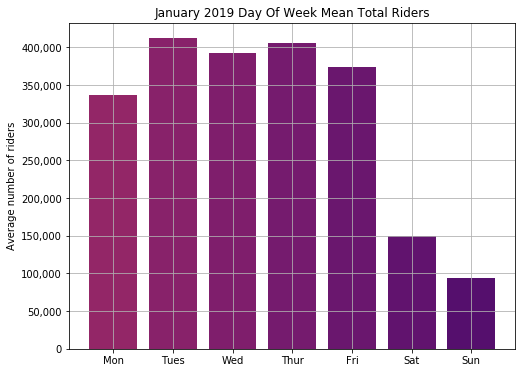

In [242]:
fig,ax = plt.subplots(figsize = (8,6))
ax.grid(True)
fig.set_facecolor('white')
plt.bar(jan_2019_week.day_of_week_index,jan_2019_week.Total, color = mpl.cm.inferno_r(np.linspace(.6,.75, 7)))
ax.set_title('January 2019 Day Of Week Mean Total Riders')
ax.set_xticklabels(['','Mon','Tues','Wed','Thur','Fri','Sat','Sun'])
ax.set_ylabel('Average number of riders')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))




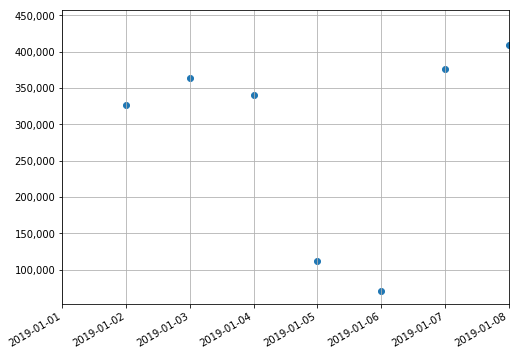

In [64]:
fig,ax = plt.subplots(figsize = (8,6))
ax.grid(True)
fig.set_facecolor('white')
ax.set_xlim(pd.datetime(2019,1,1),pd.datetime(2019,1,8))
plt.scatter(df.Date,df.Total)
fig.autofmt_xdate()
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

In [300]:
weekday_df = df[(df.Day=='w') & (df.Date > pd.datetime(2010,1,1))]

In [301]:
weekday_df = weekday_df.set_index('Date')['Total']

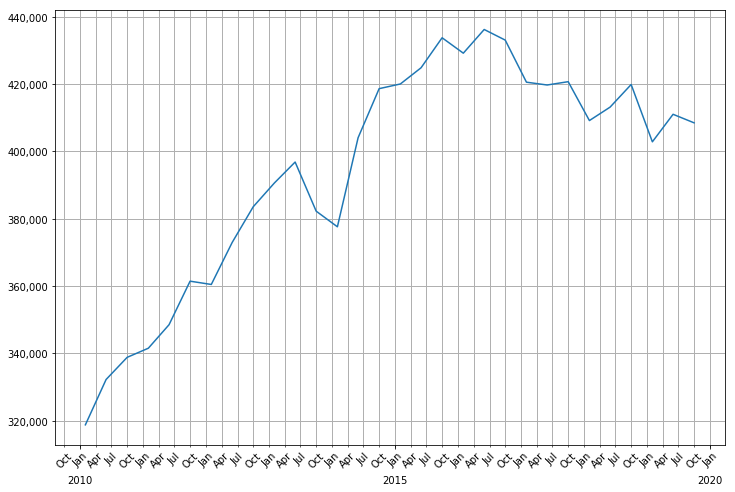

In [327]:
years = mpl.dates.YearLocator(base = 5)
months = mpl.dates.MonthLocator(bymonth=[1,4,7,10])
monthsFmt = mpl.dates.DateFormatter('%b') 
yearsFmt = mpl.dates.DateFormatter('\n\n%Y')  # add some space for the year label

fig,ax = plt.subplots(figsize=(12,8))
fig.set_facecolor('white')
weekday_df_resampled=weekday_df.resample('4M').mean()
plt.plot(weekday_df_resampled.index.to_pydatetime(),weekday_df_resampled)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
# fig.autofmt_xdate()
ax.grid(b=True,which='both',linewidth=1,linestyle='-')

ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(monthsFmt)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=45)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

In [219]:
stations

{'RM': 'Richmond',
 'EN': 'El Cerrito Del Norte',
 'EP': 'El Cerrito Plaza',
 'NB': 'North Berkeley',
 'BK': 'Berkeley',
 'AS': 'Ashby',
 'MA': 'MacArthur',
 '19': '19th Street Oakland',
 '12': '12th Street / Oakland City Center',
 'LM': 'Lake Merritt',
 'FV': 'Fruitvale',
 'CL': 'Coliseum / Oakland Airport',
 'SL': 'San Leandro',
 'BF': 'Bayfair',
 'HY': 'Hayward',
 'SH': 'South Hayward',
 'UC': 'Union City',
 'FM': 'Fremont',
 'CN': 'Concord',
 'PH': 'Pleasant Hill',
 'WC': 'Walnut Creek',
 'LF': 'Lafayette',
 'OR': 'Orinda',
 'RR': 'Rockridge',
 'OW': 'West Oakland',
 'EM': 'Embarcadero',
 'MT': 'Montgomery Street',
 'PL': 'Powell Street',
 'CC': 'Civic Center',
 '16': '16th Street Mission',
 '24': '24th Street Mission',
 'GP': 'Glen Park',
 'BP': 'Balboa Park',
 'DC': 'Daly City',
 'CM': 'Colma',
 'CV': 'Castro Valley',
 'ED': 'Dublin / Pleasanton',
 'NC': 'North Concord / Martinez',
 'WP': 'Pittsburg/BayPoint',
 'SS': 'South San Francisco',
 'SB': 'San Bruno',
 'SO': 'San Francisc

In [221]:
df.ML.sum()

0.0

Text(0.5, 0, 'Average Exit Volume Per Day')

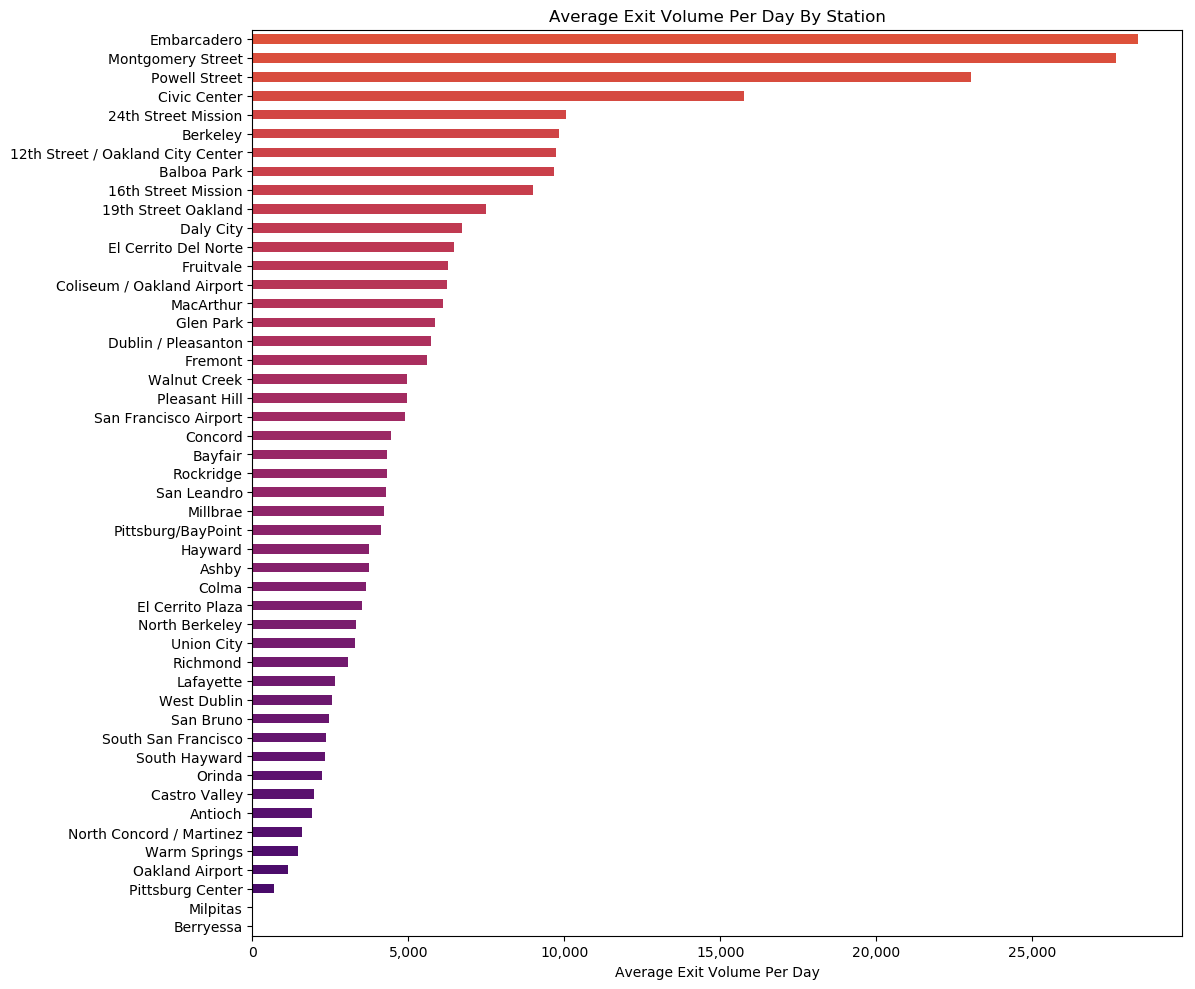

In [234]:
fig,ax=plt.subplots(figsize=(12,12),dpi=100)
fig.set_facecolor('white')
df.loc[:,'RM':'AN'].mean().sort_values().plot(kind='barh', color = mpl.cm.inferno_r(np.linspace(.8,.4, 48)))
ax.set_yticklabels([stations[i.get_text()] for i in list(ax.get_yticklabels())])
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_title('Average Exit Volume Per Day By Station')
ax.set_xlabel('Average Exit Volume Per Day')

In [10]:
df.columns

Index([               'FY',               'Qtr',             'Month',
                     'Day', 'day_of_week_index',              'Date',
                      'RM',                'EN',                'EP',
                      'NB',                'BK',                'AS',
                      'MA',                  19,                  12,
                      'LM',                'FV',                'CL',
                      'SL',                'BF',                'HY',
                      'SH',                'UC',                'FM',
                      'CN',                'PH',                'WC',
                      'LF',                'OR',                'RR',
                      'OW',                'EM',                'MT',
                      'PL',                'CC',                  16,
                        24,                'GP',                'BP',
                      'DC',                'CM',                'CV',
                    

In [30]:
df.set_index('Date').resample('M').mean()

,day_of_week_index,RM,EN,EP,NB,BK,AS,MA,19,12,FV,CL,SL,BF,HY,SH,UC,FM,CN,PH,WC,LF,OR,RR,EM,MT,PL,CC,16,24,GP,BP,DC,CM,CV,ED,NC,WP,SS,SB,SO,MB,WD,OA,WS,ML,BE,PC,AN,Total
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1998-01-31,3.096774,2366.347826,6088.782609,3421.260870,2767.956522,8205.826087,2970.956522,4293.043478,5757.521739,7879.217391,5315.739130,3813.304348,3499.913043,3555.695652,3451.173913,2213.826087,2946.173913,4556.304348,3873.173913,4562.086957,4510.782609,2316.652174,2181.173913,3748.608696,19625.565217,26345.260870,15666.000000,9823.913043,5340.782609,8007.347826,5226.782609,8149.434783,5026.913043,4717.130435,1198.217391,3399.434783,1162.608696,2939.086957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166199.600000
1998-02-28,3.000000,2408.884615,5960.653846,3192.846154,2734.038462,8626.115385,2991.346154,4282.576923,5682.076923,7844.153846,5377.076923,3836.730769,3472.692308,3537.346154,3548.923077,2183.846154,3004.384615,4583.307692,3681.038462,4485.153846,4240.269231,2257.730769,2093.653846,3726.076923,19011.115385,26246.769231,15810.230769,9992.538462,5516.538462,8128.615385,5233.307692,8986.923077,5684.230769,4571.000000,1228.192308,3498.346154,1136.076923,2963.346154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202052.571429
1998-03-31,2.935484,2429.166667,6067.200000,3112.166667,2679.366667,8647.733333,2956.333333,4199.500000,5591.433333,7849.366667,5372.800000,3758.966667,3455.633333,3565.666667,3464.800000,2174.966667,2898.566667,4518.233333,4048.133333,4304.200000,4346.533333,2262.100000,2064.866667,3640.966667,18273.933333,25263.733333,15766.266667,8893.666667,5523.400000,8147.300000,5193.433333,9006.900000,5574.833333,4742.633333,1241.666667,3474.766667,1131.433333,3046.233333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207696.870968
1998-04-30,2.966667,2532.833333,6025.966667,3134.800000,2756.033333,8641.366667,2956.166667,4228.466667,5715.133333,8026.600000,5724.666667,5113.866667,3552.800000,3666.766667,3740.066667,2250.600000,2986.833333,4843.033333,4394.866667,4472.966667,4529.966667,2259.500000,2092.166667,3349.233333,19172.600000,26143.700000,16222.300000,10127.633333,5613.200000,8207.833333,5224.166667,8683.433333,5490.366667,4885.666667,1354.266667,3795.433333,1170.566667,3146.066667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,222185.566667
1998-05-31,3.193548,2457.700000,5933.633333,2945.566667,2592.733333,7587.000000,2825.866667,4127.233333,5102.966667,7607.100000,5458.700000,4181.866667,3363.400000,3507.466667,3487.633333,2098.100000,2847.700000,4487.800000,4157.100000,4343.000000,4270.066667,2148.100000,1994.366667,3253.333333,18292.933333,23994.933333,15637.766667,9866.566667,5657.166667,8095.866667,4995.533333,8335.500000,5280.433333,4617.766667,1285.433333,3515.900000,1105.166667,3056.133333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203476.612903
1998-06-30,2.833333,2505.862069,6082.448276,3164.379310,2709.655172,8589.206897,2994.965517,4341.206897,5418.310345,8291.482759,5634.931034,5136.517241,3562.000000,3593.275862,3572.068966,2187.931034,2971.689655,4765.310345,4409.206897,4787.620690,4573.896552,2336.103448,2149.482759,3233.275862,19531.551724,25675.482759,16957.413793,10695.965517,5772.448276,8134.862069,5269.206897,8078.068966,5586.137931,4998.827586,1388.931034,3893.793103,1190.034483,3113.344828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215881.133333
1998-07-31,3.000000,2512.466667,6219.066667,3157.833333,2726.800000,8545.266667,3050.266667,4410.500000,5514.633333,8202.800000,5737.500000,5250.800000,3687.666667,3589.900000,3639.266667,2163.833333,3010.166667,4922.966667,4422.566667,4723.566667,4683.800000,2354.266667,2164.333333,3672.833333,19619.500000,24423.566667,16647.333333,10624.333333,6095.500000,8029.566667,5231.900000,7999.466667,4814.833333,5037.733333,1395.966667,4047.933333,1155.233333,3097.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215719.709677
1998-08-31,3.064516,2457.935484,5890.870968,3104.387097,2599.419355,8331.290323,2988.387097,4261.9

In [25]:
df.groupby('Month').mean()

,day_of_week_index,RM,EN,EP,NB,BK,AS,MA,19,12,FV,CL,SL,BF,HY,SH,UC,FM,CN,PH,WC,LF,OR,RR,EM,MT,PL,CC,16,24,GP,BP,DC,CM,CV,ED,NC,WP,SS,SB,SO,MB,WD,OA,WS,ML,BE,PC,AN,Total
Month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
April,2.998551,3118.121212,6576.098485,3586.715152,3360.260606,10118.984848,3826.213636,6197.593939,7738.607576,9956.318182,6377.800000,6749.672727,4365.401515,4390.337879,3898.868182,2394.015152,3380.339394,5693.830303,4529.230303,5071.272727,4991.071212,2675.809091,2210.709091,4336.465152,28971.051515,28509.493939,22507.796970,16066.472727,9150.922727,10244.615152,5942.736364,9954.466667,6929.068182,3722.721212,1984.142424,5791.727273,1627.074242,4172.246970,2418.962500,2493.164583,4721.937500,4171.066667,2649.044444,1219.586667,1605.313333,0.0,0.0,456.433333,1200.266667,292243.936364
August,3.000000,3112.241935,6592.862170,3534.862170,3353.932551,10162.693548,3811.675953,6258.341642,7616.950147,10049.831378,6385.667155,7148.334311,4448.142229,4428.900293,3748.582111,2393.593842,3412.956012,5865.760997,4585.787390,5138.177419,5203.219941,2735.706745,2303.036657,4363.107038,30387.769795,28471.854839,23648.436950,15905.989736,9088.627566,10048.224340,5946.897361,9539.844575,6581.649560,3699.671554,2056.824047,6198.365103,1606.055718,4175.593842,2395.814042,2519.681214,5481.223909,4371.497154,2882.000000,1096.123656,1798.645161,0.0,0.0,785.387097,2342.016129,296728.639296
December,3.002933,2817.834877,6004.510802,3247.402778,3036.037037,7961.060185,3345.439815,5596.013889,6748.429012,8753.646605,5859.873457,5934.382716,4006.993827,4168.861111,3365.300926,2135.047840,3002.171296,5106.322531,4051.337963,4492.623457,4701.572531,2488.220679,2091.655864,4005.515432,25374.655864,25023.802469,25715.492284,14505.927469,8366.211420,9444.212963,5575.086420,8965.830247,6355.578704,3411.433642,1855.387346,5374.700617,1453.604938,3877.054012,2164.927419,2352.842742,4987.701613,3888.877016,2289.756272,1319.219355,1248.532258,0.0,0.0,737.387097,1980.903226,267232.740399
February,3.000000,3040.975728,6456.072816,3539.741100,3318.932039,10067.708738,3769.237864,6113.250809,7594.244337,9835.077670,6213.605178,5199.686084,4212.017799,4284.100324,3796.275081,2321.446602,3265.726537,5522.991909,4374.864078,4927.389968,4828.538835,2588.105178,2157.024272,4294.433657,27485.268608,28266.587379,22279.799353,15732.208738,8991.053398,10165.762136,5844.470874,10023.085761,7116.868932,3645.122977,1888.504854,5344.718447,1565.899676,4056.566343,2365.944690,2450.287611,4142.157080,4156.730088,2414.523622,1094.269504,1136.099291,0.0,0.0,826.000000,2233.071429,283126.054750
January,3.000000,2870.832761,6109.459966,3330.823153,3163.915637,8752.143957,3563.863323,5812.361757,7225.331922,9318.533950,5829.464804,5056.085050,3994.046392,4065.196656,3585.393900,2194.874453,3100.681036,5162.181333,4164.240285,4716.565601,4666.989003,2502.089379,2096.939390,4081.547037,26144.270418,26364.360460,21144.916236,14753.234039,8477.562806,9575.029785,5619.382045,9184.192200,5929.852825,3469.393652,1801.114261,5133.139834,1477.884358,3884.416423,2204.233871,2293.828629,3780.389113,3923.151210,2255.261649,935.683871,1076.309677,0.0,0.0,775.677419,2180.161290,264185.679412
July,2.997067,2961.367107,6254.704846,3383.822320,3203.185022,10076.042584,3691.024963,5967.372981,7240.892805,9551.828194,6063.233480,6328.701909,4231.246696,4237.270191,3578.443465,2308.530103,3271.530103,5638.424376,4358.562408,4895.785609,5010.566814,2653.778267,2221.892805,4236.371512,29551.076358,27313.834068,22840.925110,15168.425844,8787.305433,9622.443465,5734.487518,8761.963289,6025.631424,3536.421439,1967.723935,6023.218796,1514.766520,4001.355360,2274.332068,2384.840607,5116.721063,4220.700190,2700.254480,1030.500000,1674.548387,0.0,0.0,827.403226,2251.419355,283432.872434
June,2.997101,3098.364188,6569.716237,3560.877086,3426.745068,9829.054628,3907.166920,6328.254932,7814.776935,10159.928680,6370.286798,6823.931715,4429.179059,4446.094082,3785.069803,2412.151745,3417.063733,

In [24]:
df.groupby('Month').mean().sort_values(by=)

TypeError: sort_values() missing 1 required positional argument: 'by'

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

,day_of_week_index,RM,EN,EP,NB,BK,AS,MA,19,12,FV,CL,SL,BF,HY,SH,UC,FM,CN,PH,WC,LF,OR,RR,EM,MT,PL,CC,16,24,GP,BP,DC,CM,CV,ED,NC,WP,SS,SB,SO,MB,WD,OA,WS,ML,BE,PC,AN,Total
month_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12,3.002933,2817.834877,6004.510802,3247.402778,3036.037037,7961.060185,3345.439815,5596.013889,6748.429012,8753.646605,5859.873457,5934.382716,4006.993827,4168.861111,3365.300926,2135.047840,3002.171296,5106.322531,4051.337963,4492.623457,4701.572531,2488.220679,2091.655864,4005.515432,25374.655864,25023.802469,25715.492284,14505.927469,8366.211420,9444.212963,5575.086420,8965.830247,6355.578704,3411.433642,1855.387346,5374.700617,1453.604938,3877.054012,2164.927419,2352.842742,4987.701613,3888.877016,2289.756272,1319.219355,1248.532258,0.0,0.0,737.387097,1980.903226,267232.740399
11,3.001515,3029.374603,6353.339683,3442.377778,3245.236508,9948.225397,3619.892063,5960.304762,7192.066667,9227.695238,6212.568254,6075.698413,4187.298413,4240.300000,3738.395238,2259.093651,3203.739683,5483.957143,4280.969841,4763.825397,4830.740859,2580.609524,2161.368254,4271.571429,26120.803175,26489.009524,23595.709524,15341.825397,8754.280952,9911.130159,5759.307937,9765.422222,6826.406349,3526.953968,1920.098413,5533.425397,1543.490476,4077.661905,2276.725000,2390.239583,4867.093750,4115.808333,2314.022222,1151.820000,1411.450000,0.0,0.0,825.433333,2130.833333,280395.711111
10,2.991202,3228.126543,6834.827160,3683.419753,3467.876543,10837.554012,3919.401235,6476.834877,7848.441358,10062.864198,6664.691358,6456.503086,4521.367284,4549.706790,4086.003086,2459.098765,3488.231481,5947.850309,4652.128086,5193.183642,5167.055556,2797.640432,2356.671296,4546.637346,29817.705247,28843.490741,23264.408951,16758.141975,9399.682099,10424.799383,6073.219136,10496.001543,7587.104777,3743.093991,2051.945988,5934.867284,1681.720679,4340.331790,2446.161290,2529.766129,5014.931452,4426.558468,2522.931900,1082.651613,1518.427419,0.0,0.0,959.225806,2440.838710,300760.648233
9,3.007576,3164.049206,6750.417460,3637.930159,3445.482540,10806.000000,3851.287302,6360.323810,7619.804762,9937.179365,6518.722222,7283.342857,4455.131746,4480.595238,3819.247619,2416.822222,3423.471429,5895.155556,4615.939683,5110.314286,5103.076190,2777.479365,2329.315873,4477.112698,28952.266667,27951.598413,23192.319048,16239.484127,9108.430159,10213.836508,5967.341270,10412.623810,7411.949206,3646.330159,2032.239683,6031.117460,1638.319048,4289.587302,2393.050000,2451.089583,5195.135417,4310.712500,2771.450000,1063.233333,1272.175000,0.0,0.0,627.733333,2257.100000,297476.912698
8,3.000000,3112.241935,6592.862170,3534.862170,3353.932551,10162.693548,3811.675953,6258.341642,7616.950147,10049.831378,6385.667155,7148.334311,4448.142229,4428.900293,3748.582111,2393.593842,3412.956012,5865.760997,4585.787390,5138.177419,5203.219941,2735.706745,2303.036657,4363.107038,30387.769795,28471.854839,23648.436950,15905.989736,9088.627566,10048.224340,5946.897361,9539.844575,6581.649560,3699.671554,2056.824047,6198.365103,1606.055718,4175.593842,2395.814042,2519.681214,5481.223909,4371.497154,2882.000000,1096.123656,1798.645161,0.0,0.0,785.387097,2342.016129,296728.639296
7,2.997067,2961.367107,6254.704846,3383.822320,3203.185022,10076.042584,3691.024963,5967.372981,7240.892805,9551.828194,6063.233480,6328.701909,4231.246696,4237.270191,3578.443465,2308.530103,3271.530103,5638.424376,4358.562408,4895.785609,5010.566814,2653.778267,2221.892805,4236.371512,29551.076358,27313.834068,22840.925110,15168.425844,8787.305433,9622.443465,5734.487518,8761.963289,6025.631424,3536.421439,1967.723935,6023.218796,1514.766520,4001.355360,2274.332068,2384.840607,5116.721063,4220.700190,2700.254480,1030.500000,1674.548387,0.0,0.0,827.403226,2251.419355,283432.872434
6,2.997101,3098.364188,6569.716237,3560.877086,3426.745068,9829.054628,3907.166920,6328.254932,7814.776935,10159.928680,6370.286798,6823.931715,4429.179059,4446.094082,3785.069803,2412.151745,3417.063733,5823.359636,4582.482549

In [63]:
month_agg_df = df.groupby('month_index').mean()

In [67]:
month_agg_df['max_scaled'] = month_agg_df.Total/month_agg_df.Total.max()

In [81]:
month_agg_df.Total.max()

300760.6482334869

In [71]:
month_agg_df.max_scaled[::-1]

month_index
12    0.888523
11    0.932289
10    1.000000
9     0.989082
8     0.986594
7     0.942387
6     0.988919
5     0.956819
4     0.971683
3     0.960703
2     0.941367
1     0.878392
Name: max_scaled, dtype: float64

Text(0.5, 1.0, 'Average Riders Per Month Scaled By Max (307,000 Riders)')

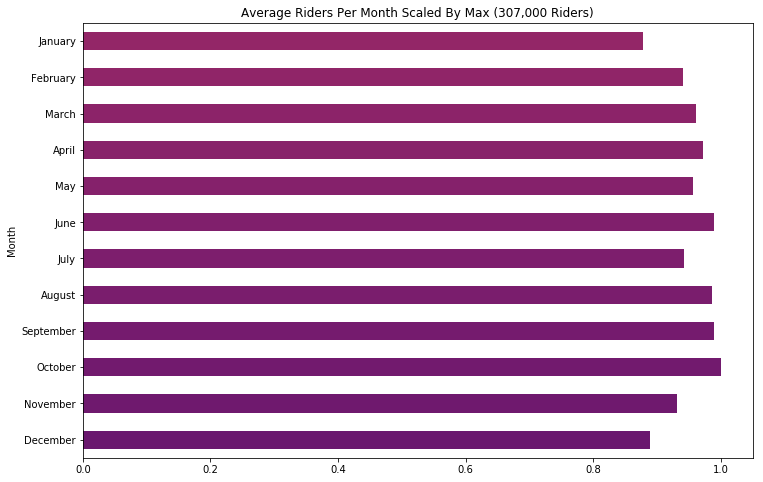

In [91]:
fig,ax = plt.subplots(figsize=(12,8))
fig.set_facecolor('white')
month_agg_df.max_scaled[::-1].plot(kind='barh',color = mpl.cm.inferno_r(np.linspace(.7,.6, 12)))
ax.grid(False)
# ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_yticklabels(df.Month.unique()[::-1])
ax.set_ylabel('Month')
ax.set_title('Average Riders Per Month Scaled By Max (307,000 Riders)')

# Look into hourly data

In [94]:
hourly=pd.read_csv('data/date-hour-soo-dest-2019.csv',header=None)

In [95]:
hourly.columns = ['date','hour','from','to','num_exits']

In [96]:
hourly.head()

,date,hour,from,to,num_exits
0,2019-01-01,0,12TH,12TH,3
1,2019-01-01,0,12TH,16TH,4
2,2019-01-01,0,12TH,ANTI,1
3,2019-01-01,0,12TH,BAYF,1
4,2019-01-01,0,12TH,CIVC,2


In [97]:
hourly.date=pd.to_datetime(hourly.date)

In [99]:
def create_date_columns(df, date_col):
    import datetime as dt
    ind = df.columns.get_loc(date_col)+1
    df.insert(ind, 'day_of_week_index', df[date_col].apply(lambda x: x.weekday()))
    df.insert(ind, 'month_index', df[date_col].apply(lambda x: x.month))
    df.insert(ind+2,'is_weekend', df['day_of_week_index'].isin([5,6]))
    return df
    

In [100]:
hourly=create_date_columns(hourly,'date')

In [101]:
hourly.head()

,date,month_index,day_of_week_index,is_weekend,hour,from,to,num_exits
0,2019-01-01,1,1,False,0,12TH,12TH,3
1,2019-01-01,1,1,False,0,12TH,16TH,4
2,2019-01-01,1,1,False,0,12TH,ANTI,1
3,2019-01-01,1,1,False,0,12TH,BAYF,1
4,2019-01-01,1,1,False,0,12TH,CIVC,2


In [120]:
hourly['from'].unique()

array(['12TH', '16TH', '19TH', '24TH', 'ANTI', 'ASHB', 'BALB', 'BAYF',
       'CAST', 'CIVC', 'COLM', 'COLS', 'CONC', 'DALY', 'DBRK', 'DELN',
       'DUBL', 'EMBR', 'FRMT', 'FTVL', 'GLEN', 'HAYW', 'LAFY', 'LAKE',
       'MCAR', 'MLBR', 'MONT', 'NBRK', 'OAKL', 'ORIN', 'PHIL', 'PITT',
       'PLZA', 'POWL', 'RICH', 'ROCK', 'SANL', 'SBRN', 'SFIA', 'SHAY',
       'SSAN', 'UCTY', 'WCRK', 'WDUB', 'WOAK', 'WSPR', 'NCON', 'BERR',
       'MILP'], dtype=object)

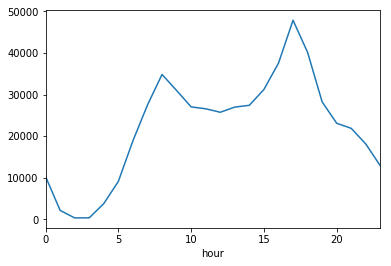

In [135]:
hourly[(hourly['from'] == hourly.to) ].groupby(['hour']).sum().num_exits.plot()

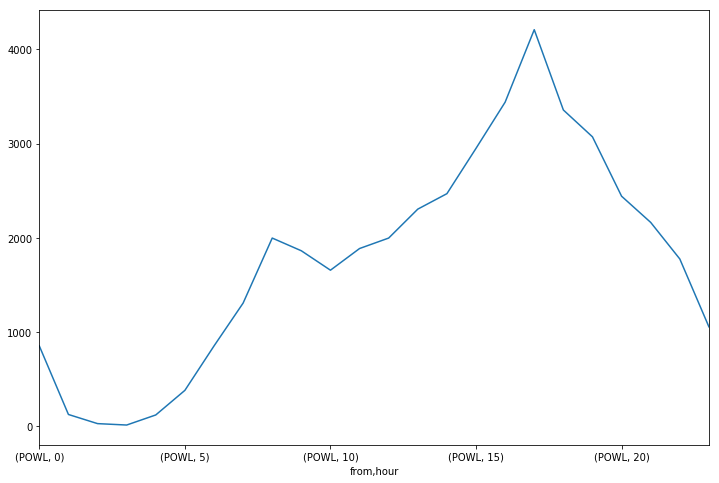

In [130]:
fig,ax = plt.subplots(figsize=(12,8))
fig.set_facecolor('white')
hourly[(hourly['from'] == hourly.to) &
#        (hourly.date == pd.datetime(2019,9,13)) &
       (hourly['from'] == 'POWL')].groupby(['from','hour']).sum().num_exits.plot()

In [187]:
hourly_mean

,month_index,day_of_week_index,is_weekend,num_exits
hour,,,,
0,3713.067568,4142.878378,755.648649,3132.621622
1,1429.513514,1550.162162,284.905405,622.500000
2,36.916667,33.250000,6.000000,8.770833
3,7.793103,7.517241,1.379310,1.931034
4,6.459459,6.891892,1.270270,1.621622
5,39.952381,40.492063,7.968254,12.984127
6,1463.681159,1500.304348,299.275362,916.782609
7,2620.876712,2672.986301,531.821918,2061.506849
8,4928.534247,5435.684932,1010.136986,4675.821918


In [194]:
hourly_mean_weekend = hourly[hourly.is_weekend].groupby(['date','hour']).sum().reset_index().groupby('hour').num_exits.mean()
hourly_mean_weekday = hourly[hourly.is_weekend==False].groupby(['date','hour']).sum().reset_index().groupby('hour').num_exits.mean()

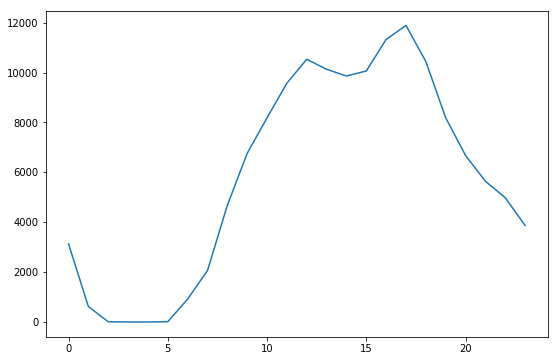

In [201]:
fig,ax = plt.subplots(figsize = (9,6))
plt.plot(hourly_mean_weekend.index,hourly_mean_weekend.values)
fig.set_facecolor('white')


NameError: name 'mdates' is not defined

TypeError: 'HourLocator' object is not iterable

NameError: name 'ticker' is not defined

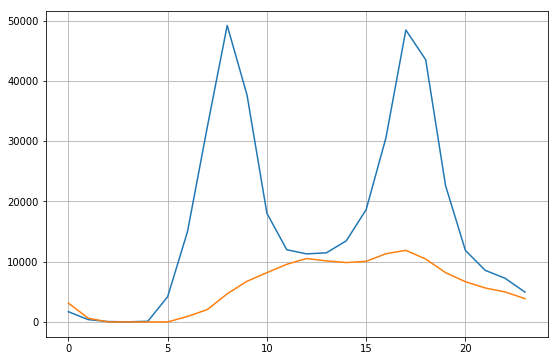

In [250]:
hours = mpl.dates.HourLocator(byhour=range(0,24,1))
# h_fmt = mpl.dates.DateFormatter('%H')

fig,ax = plt.subplots(figsize = (9,6))
fig.set_facecolor('white')

ax.grid(True)
ax.plot(hourly_mean_weekday.index,hourly_mean_weekday.values)
ax.plot(hourly_mean_weekend.index,hourly_mean_weekend.values)

# ax.xaxis.set_major_locator(hours)
# ax.xaxis.set_major_formatter(h_fmt)
# plt.setp(ax.get_xticklabels(), visible=True, rotation=30, ha='right')
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter(">%d<"))

plt.show()
# fig.autofmt_xdate()



In [148]:
def genSankey(df,cat_cols=[],value_cols='',title='Sankey Diagram'):
    # maximum of 6 value cols -> 6 colors
    colorPalette = ['#4B8BBE','#306998','#FFE873','#FFD43B','#646464']
    labelList = []
    colorNumList = []
    for catCol in cat_cols:
        labelListTemp =  list(set(df[catCol].values))
        colorNumList.append(len(labelListTemp))
        labelList = labelList + labelListTemp
        
    # remove duplicates from labelList
    labelList = list(dict.fromkeys(labelList))
    
    # define colors based on number of levels
    colorList = []
#     for idx, colorNum in enumerate(colorNumList):
#         colorList = colorList + [colorPalette[idx]]*colorNum
        
    # transform df into a source-target pair
    for i in range(len(cat_cols)-1):
        if i==0:
            sourceTargetDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            sourceTargetDf.columns = ['source','target','count']
        else:
            tempDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            tempDf.columns = ['source','target','count']
            sourceTargetDf = pd.concat([sourceTargetDf,tempDf])
        sourceTargetDf = sourceTargetDf.groupby(['source','target']).agg({'count':'sum'}).reset_index()
        
    # add index for source-target pair
    sourceTargetDf['sourceID'] = sourceTargetDf['source'].apply(lambda x: labelList.index(x))
    sourceTargetDf['targetID'] = sourceTargetDf['target'].apply(lambda x: labelList.index(x))
    
    # creating the sankey diagram
    data = dict(
        type='sankey',
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(
            color = "black",
            width = 0.5
          ),
          label = labelList,
#           color = colorList
        ),
        link = dict(
          source = sourceTargetDf['sourceID'],
          target = sourceTargetDf['targetID'],
          value = sourceTargetDf['count']
        )
      )
    
    layout =  dict(
        title = title,
        font = dict(
          size = 10
        )
    )
    fig = dict(data=[data], layout=layout)
    return fig

'temp-plot.html'

# Kepler.GL Plot

In [256]:
import json
json_file = 'data/stn.aspx.json'
with open(json_file) as json_f:
    json_data = json.load(json_f)
stn_data=pd.DataFrame(json_data['root']['stations']['station'])
stn_latlon=stn_data[['abbr','gtfs_latitude','gtfs_longitude']]

In [257]:
stn_latlon.rename(columns = {'gtfs_latitude': 'lat','gtfs_longitude': 'lon'},inplace = True)

# Sankey Plot

In [280]:
sankey_data = hourly.groupby(['is_weekend','hour','from','to']).mean().reset_index()

In [281]:
sankey_data['from_sank'] = sankey_data['from'].apply(lambda s: s + '_f')
sankey_data['to_sank'] = sankey_data['to'].apply(lambda s: s + '_t')

In [282]:
sankey_data = sankey_data.merge(stn_latlon,left_on='from',right_on = 'abbr')\
                .drop(columns = 'abbr')\
                .rename(columns = {'lat': 'from_lat','lon':'from_lon'})

In [285]:
sankey_data = sankey_data.merge(stn_latlon,left_on='to',right_on = 'abbr')\
                .drop(columns = 'abbr')\
                .rename(columns = {'lat': 'to_lat','lon':'to_lon'},inplace = False)

In [289]:
sankey_data.drop(columns = ['month_index','day_of_week_index'],inplace = True)

In [298]:
sankey_data[(sankey_data.is_weekend==False) &
           (sankey_data.hour.isin([8,9,10])) ]\
                .groupby(['from_lat','from_lon',
                          'to_lat','to_lon']).mean().reset_index()\
                .drop(columns=['is_weekend','hour']).to_csv('data/kep_dataset.csv')

In [291]:
sankey_data[sankey_data.is_weekend == False]\
    .groupby(['hour','to']).mean().reset_index()\
    .sort_values(by='num_exits',ascending = False).head(10)[['hour','to','is_weekend','num_exits']]

,hour,to,is_weekend,num_exits
375,8,EMBR,False,264.391250
384,8,MONT,False,256.710409
429,9,MONT,False,213.958528
420,9,EMBR,False,203.250680
330,7,EMBR,False,157.921036
339,7,MONT,False,137.640221
367,8,CIVC,False,100.674397
474,10,MONT,False,88.354469
392,8,POWL,False,82.185962
465,10,EMBR,False,80.472140


In [192]:
fig = genSankey(
    sankey_data[(sankey_data['to'] == 'EMBR_t') & 
               sankey_data['hour'].isin([8,9,10])]\
                    .sort_values(by='num_exits',ascending=False).head(10),
                cat_cols=['from','to'],value_cols='num_exits')
plotly.offline.plot(fig, validate=False)

'temp-plot.html'

In [32]:
one_station = sankey_data[sankey_data['from'] == '12TH'].head()

In [33]:
one_station.num_exits.values

array([70749, 13280, 58461, 34741, 51158])

In [78]:
 list(one_station['to'].values)

['16TH', '19TH', '24TH', 'ANTI', 'ASHB']

In [77]:
list(one_station['from'].values)

['12TH', '12TH', '12TH', '12TH', '12TH']

In [145]:
from plotly import graph_objs as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["A1", "A2", "B1", "B2", "C1", "C2"],
      color = "blue"
    ),
    link = dict(
#       source = list(one_station['from'].values), # indices correspond to labels, eg A1, A2, A2, B1, ...
      source = ['12TH', '12TH', '12TH', '12TH', '12TH','6'],
#       target = list(one_station['to'].values),
#       value = list(one_station.num_exits.values)
        
        
#       source = ['0T', '1', '0', '2', '3', '3'], # indices correspond to labels, eg A1, A2, A2, B1, ...
#       target = [2, 3, 3, 4, 4, 5],
      value = [8, 4, 2, 8, 4, 2]
  ))])

fig.layout.update(title="Basic Sankey Diagram")
fig.show()


In [2]:
plotly.__version__

'4.1.1'

In [93]:
df

,FY,Qtr,Month,Day,month_index,day_of_week_index,Date,RM,EN,EP,NB,BK,AS,MA,19,12,LM,FV,CL,SL,BF,HY,SH,UC,FM,CN,PH,WC,LF,OR,RR,OW,EM,MT,PL,CC,16,24,GP,BP,DC,CM,CV,ED,NC,WP,SS,SB,SO,MB,WD,OA,WS,ML,BE,PC,AN,Total
0,FY98,1998Q3,January,hol,1,3,1998-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FY98,1998Q3,January,w,1,4,1998-01-02,2042.0,4854.0,2168.0,2123.0,5228.0,2138.0,3388.0,4020.0,5880.0,1985,4390.0,3331.0,2723.0,3046.0,2779.0,1748.0,2292.0,3657.0,1509.0,2198.0,3511.0,1422.0,1358.0,2737.0,2227,12818.0,19133.0,15558.0,7324.0,4293.0,6393.0,3940.0,5759.0,4079.0,3543.0,892.0,1222.0,483.0,2462.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160653.0
2,FY98,1998Q3,January,sa,1,5,1998-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,FY98,1998Q3,January,su,1,6,1998-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,FY98,1998Q3,January,w,1,0,1998-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,FY98,1998Q3,January,w,1,1,1998-01-06,2643.0,7613.0,3787.0,3124.0,9791.0,3370.0,5024.0,7033.0,9309.0,2934,6500.0,3714.0,4158.0,4101.0,4279.0,2599.0,3585.0,5347.0,5300.0,6200.0,5577.0,3015.0,2699.0,4510.0,3432,23969.0,28647.0,17513.0,10939.0,5887.0,9159.0,6207.0,8714.0,5962.0,5784.0,1479.0,4206.0,1436.0,3647.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,253193.0
6,FY98,1998Q3,January,w,1,2,1998-01-07,2653.0,6993.0,3631.0,3334.0,9500.0,3288.0,5023.0,6858.0,9276.0,3060,6075.0,4646.0,4208.0,4040.0,4343.0,2588.0,3595.0,5560.0,5200.0,6200.0,5520.0,2963.0,2723.0,4508.0,3412,24322.0,33707.0,17956.0,11740.0,5943.0,8889.0,6249.0,8621.0,5884.0,5892.0,1555.0,4363.0,1491.0,3706.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259515.0
7,FY98,1998Q3,January,w,1,3,1998-01-08,2620.0,6816.0,3751.0,3332.0,9791.0,3333.0,5062.0,7109.0,9437.0,3009,6500.0,3858.0,4248.0,4181.0,4178.0,2614.0,3597.0,5473.0,5300.0,6200.0,5737.0,2948.0,2773.0,4573.0,3562,24860.0,34543.0,18289.0,11513.0,6081.0,9001.0,6274.0,8622.0,5882.0,5818.0,1487.0,4100.0,1363.0,3653.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,261488.0
8,FY98,1998Q3,January,w,1,4,1998-01-09,2699.0,7530.0,6816.0,3330.0,9500.0,3225.0,4967.0,6803.0,8945.0,3140,5882.0,4679.0,4095.0,4015.0,4046.0,2536.0,3407.0,5326.0,5200.0,5800.0,5327.0,2726.0,2637.0,4342.0,3418,23638.0,32222.0,17962.0,10897.0,6002.0,9018.0,5995.0,8190.0,5740.0,5720.0,1459.0,4169.0,1361.0,3566.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256330.0
9,FY98,1998Q3,January,sa,1,5,1998-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
